In [60]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [61]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle

In [63]:
np.random.seed(0)

In [64]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [65]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [66]:
assert(X_train.shape [0] == y_train.shape[0]), "The number of image is not equual to the number of labels"
assert(X_val.shape [0] == y_val.shape[0]), "The number of image is not equual to the number of labels"
assert(X_test.shape [0] == y_test.shape[0]), "The number of image is not equual to the number of labels"
assert(X_train.shape[1:] ==(32, 32, 3)), "The dimension of the images are not 32 x 32 x3"
assert(X_val.shape[1:] ==(32, 32, 3)), "The dimension of the images are not 32 x 32 x3"
assert(X_test.shape[1:] ==(32, 32, 3)), "The dimension of the images are not 32 x 32 x3"

In [67]:
import pandas as pd

In [68]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

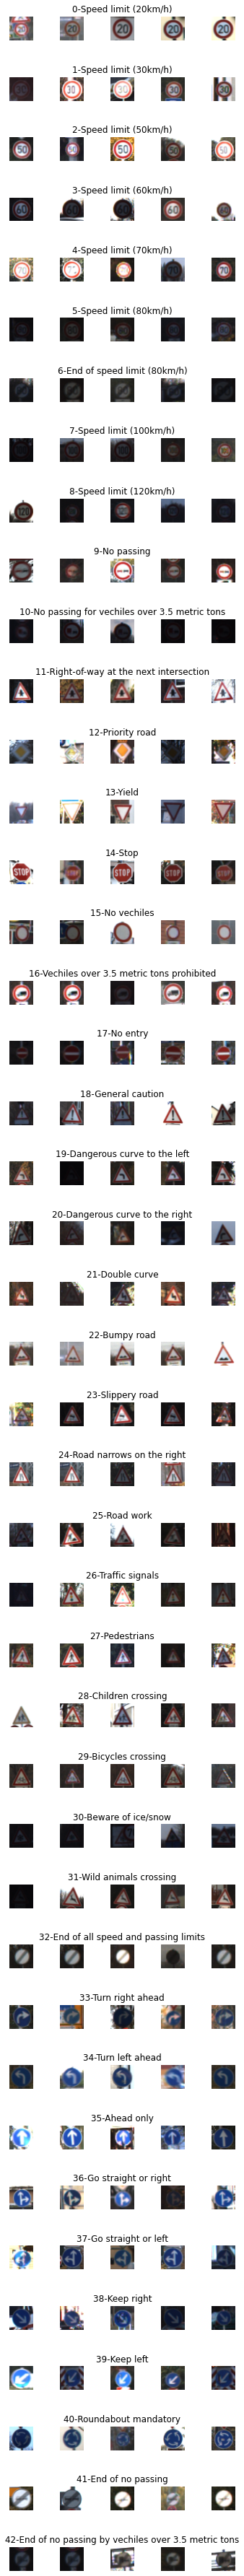

In [69]:
import random
num_of_samples = []
	 
cols = 5
num_classes = 43
	 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + "-" + row["SignName"])
      num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


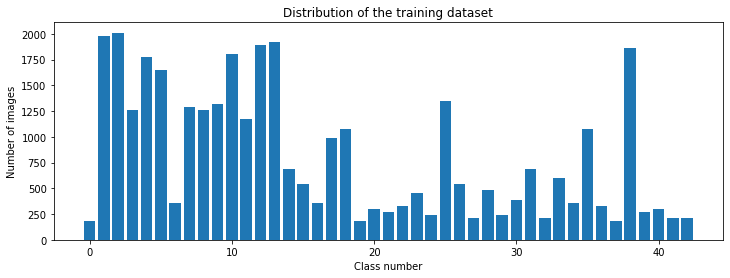

In [70]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


(32, 32, 3)
36


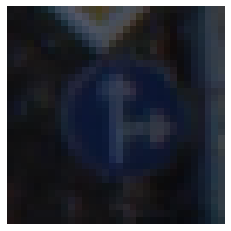

In [71]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


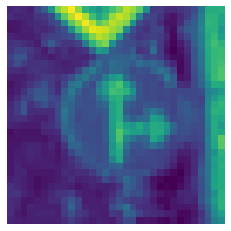

In [72]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


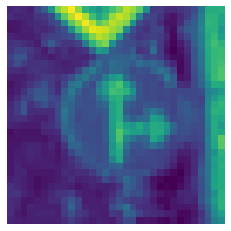

In [73]:
def equalize(img):
  cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [74]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


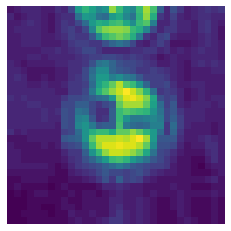

In [75]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [76]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [77]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
          height_shift_range=0.1,
          zoom_range=0.2,
          shear_range=0.1,
          rotation_range=10)
datagen.fit(X_train)


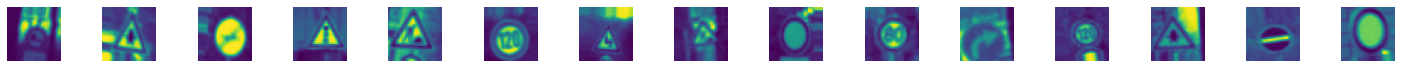

In [78]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fit, axs = plt.subplots(1, 15, figsize=(20, 5))
fit.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [79]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [80]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [97]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))
  model.add(Conv2D(60, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation= 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  #Compile model
  model.compile(adam_v2.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [98]:
model=modified_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [99]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=500, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


500/500 [==============================] - 10s 20ms/step - loss: 2.3324 - accuracy: 0.3565 - val_loss: 0.6183 - val_accuracy: 0.8109
Epoch 2/10
500/500 [==============================] - 10s 20ms/step - loss: 0.7630 - accuracy: 0.7727 - val_loss: 0.2578 - val_accuracy: 0.9188
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 0.4357 - accuracy: 0.8697 - val_loss: 0.1755 - val_accuracy: 0.9463
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.3227 - accuracy: 0.9006 - val_loss: 0.0938 - val_accuracy: 0.9721
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2590 - accuracy: 0.9216 - val_loss: 0.0856 - val_accuracy: 0.9735
Epoch 6/10
500/500 [==============================] - 11s 21ms/step - loss: 0.2070 - accuracy: 0.9376 - val_loss: 0.0804 - val_accuracy: 0.9762
Epoch 7/10
500/500 [==============================] - 10s 20ms/step - loss: 0.1826 - accuracy: 0.9442 - val_loss: 0.0868 - val_accuracy: 0.9762
Epo

Text(0.5, 0, 'epoch')

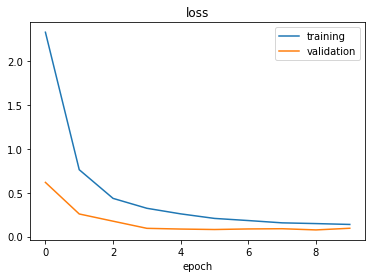

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
        

In [101]:
history.history

{'accuracy': [0.3564542531967163,
  0.772710919380188,
  0.869674801826477,
  0.900600016117096,
  0.9216368794441223,
  0.9375575184822083,
  0.9441977739334106,
  0.9519199728965759,
  0.9545981884002686,
  0.9589200019836426],
 'loss': [2.332414150238037,
  0.7630290389060974,
  0.4357326924800873,
  0.3226812779903412,
  0.2589659094810486,
  0.2070026397705078,
  0.18260210752487183,
  0.15643493831157684,
  0.14799156785011292,
  0.13818436861038208],
 'val_accuracy': [0.8108843564987183,
  0.918820858001709,
  0.9462584853172302,
  0.9721088409423828,
  0.9734693765640259,
  0.976190447807312,
  0.976190447807312,
  0.9705215692520142,
  0.9770975112915039,
  0.978458046913147],
 'val_loss': [0.6183374524116516,
  0.2577632963657379,
  0.17545168101787567,
  0.0937989130616188,
  0.08556805551052094,
  0.08035954087972641,
  0.0868329256772995,
  0.08933699876070023,
  0.07573055475950241,
  0.09457778185606003]}

Text(0.5, 0, 'epoch')

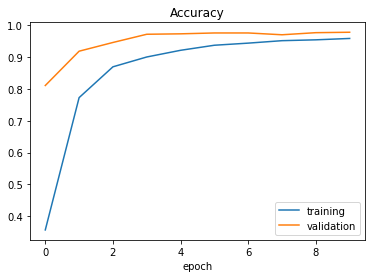

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [103]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:',score[1])

Test Score: 0.15439310669898987
Test Accuracy: 0.9619160890579224


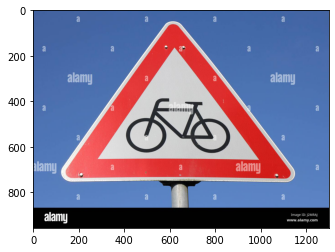

In [104]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


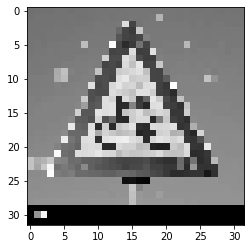

In [105]:
img = np.asarray(img)
img = cv2.resize(img, (32,32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [106]:
img = img.reshape(1, 32, 32, 1)

In [107]:
print("predicted sign: "+str(np.argmax(model.predict(img), axis=-1)))

predicted sign: [24]
